$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\di}[0]{\text{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\ci}[0]{\text{i}}$
$\newcommand{\unit}[1]{\boldsymbol{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$

In [1]:
from IPython.display import Image, display, YouTubeVideo
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
from ipywidgets import interact, FloatSlider, fixed
from matplotlib import rcParams
interactive(True)
rcParams['figure.dpi'] = 100  # for crisper figures later

*Readings:*

* *Morin 4.3-4.4*
* *Last 1/3 of French's Chapter 3, "The Decay of Free Vibrations"* (a lot more explanations again)



# Expectations

## Remember

* The generic form of the DHO, $\ddot x + 2\gamma \dot x + \omega_0^2x = 0$,
* the definitions of $\omega_0^2$ and $\gamma$ for the mass-spring system, and what they represent physically (oscillations and damping),
* the three regimes, and how $\omega_0^2 - \gamma^2$ determines the regime.
* for a lightly-damped oscillator, the expression of the (pseudo-)period of oscillation, i.e., $\omega_d^2 = \omega_0^2 - \gamma^2$,
* the general shape of the oscillations for underdamped, overdamped and critically damped oscillators, and the various features that are present on it (envelope, pseudo-period, logarithmic decrement),
* that the critically-damped oscillator is the one for which the decay is the quickest,
* the definition of the quality factor $Q = \omega_0/(2\gamma)$, and
* that $Q$ is a measure of how many times an underdamped oscillator oscillates before dying.
* If an oscillator is driven at angular frequency $\omega$, then the oscillator also oscillates at angular frequency $\omega$, no matter what its value of $\omega_0$ and $\gamma$ are.
* If an undamped oscillator is driven at $\omega = \omega_0$, then the oscillator resonates, i.e., it amplifies the oscillations of the driver. In the undamped case, the amplitude diverges to infinity.

## Understand

* The three terms entering Newton's 2nd law for a damped oscillator, and how to cast it in the generic form $\ddot x + 2\gamma \dot x + \omega_0^2x = 0$,
* How adopt-an-exponential in the forced case leads to knowing the oscillation's frequency, amplitude and phase shift with respect to the forcing,
* how the three cases of oscillators are derived, and the connection between complex exponentials and oscillations vs. real exponentials and exponential decay,
* how the expressions for the evolution of the various energies are derived, and
* that all damped linear harmonic oscillators behave the same way.

## Apply

See worked examples, tutorials and problem sets.

# Recap of last lecture


In previous lectures, we introduced the importance of second-order ODEs in the description of simple oscillators. 
But our oscillations went on forever, which of course is not realistic: the mass attached to the spring eventually comes to rest, and so does the pendulum.
This is because almost every physical system contains dissipative processes, which slowly leak energy out to the wider world (often in the form of heat).
We introduced damping in the last lecture, and are continuing to describe this form of motion.
We found that the ODE, describing this form of motion was
$$\ddot x + 2\gamma \dot x + \omega_0^2 x = 0.$$

Using the "adopt-an-exponential" method, we found that exponentials $x = c\eexp{rt}$ could be solutions to the ODE above under the condition that 
$$r_\pm = -\gamma \pm \sqrt{\gamma^2 - \omega_0^2},$$
yielding the general solution
\begin{align}
    x(t) & = c_+\eexp{r_+ t} + c_-\eexp{r_-t}
           = c_+\eexp{-\gamma t}\eexp{t\sqrt{\gamma^2 - \omega_0^2}} + c_-\eexp{-\gamma t}\eexp{-t\sqrt{\gamma^2 - \omega_0^2}} \nonumber \\
         & = \eexp{-\gamma t}\left(c_+\eexp{t\sqrt{\gamma^2 - \omega_0^2}} + c_-\eexp{-t\sqrt{\gamma^2 - \omega_0^2}}\right).\label{eq:DHO_gensol}
\end{align}

Looking at eqn. \eqref{eq:DHO_gensol} in detail, we realized that there were three cases to consider:

1. If $\gamma^2 < \omega_0^2$, then inside the square root is negative, the square root is purely imaginary, and $r_\pm$ have a real and an imaginary part.
    As we are about to see, solutions oscillate, on top of decaying exponentially.
    This case is called "underdamped", or "light damping", because the dissipation ($\gamma$) is small enough that oscillations ($\omega_0$) can happen.
    SHM (Simple Harmonic Motion) is a special case of this, which happens when $\gamma =0$.

2. If $\gamma^2 > \omega_0^2$, then inside the square root is positive, the square root is real, and both $r_\pm$ are real and negative (the latter isn't obvious; see next lecture).
    The solutions are decaying exponentially.
    This case is called "overdamped" or "heavy damping", because the dissipation ($\gamma$) is so strong that the oscillation ($\omega_0$) cannot happen even once.

3. If $\gamma^2 = \omega_0^2$, then $r_+ = r_- = -\gamma$.
    Eqn. \eqref{eq:DHO_gensol} is not even valid as a solution anymore, the actual solution being $x(t) = (A + B t)\exp(-\gamma t)$, with $A$ and $B$ TBD (again, not obvious; we'll see it later). 
    This case is called "critical damping".

Pause for a second and re-watch the video  about the pendulums and different levels of damping (https://youtu.be/99ZE2RGwqSM): there were two regimes and an intermediate case.
These are the three regimes here.
Let us now investigate these three regimes in detail.

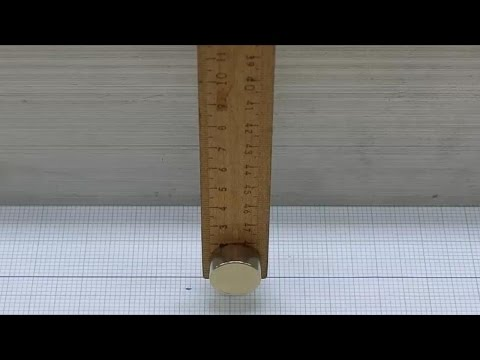

In [2]:
YouTubeVideo('99ZE2RGwqSM', width=640, height=400)

# The three regimes of damping

## Light Damping ($\omega_0^2 > \gamma^2$)

### Solution

Let $$\omega_d^2 = \omega_0^2 - \gamma^2 >0 \quad\textrm{and}\quad T_d = \frac{2\pi}{\omega_d}. $$
Therefore,
$$r_\pm = -\gamma \pm \ci\omega_d,\quad \andeq  x(t) = \eexp{- \gamma t}\left(c_+\eexp{\ci\omega_d t} + c_-\eexp{-\ci\omega_d t}\right),$$
with $(c_+, c_-) \in \mathbb C^2$.
In fact, we know that the signal needs to be real, i.e., that
$$c_+ = c_-^* = c,$$
just like for SHM, and that alternative forms for the position are
$$x(t) = A\eexp{-\gamma t}\cos(\omega_d t + \phi) = \left[B\cos(\omega_d t) + C\sin(\omega_d t)\right]\eexp{-\gamma t} = \dots$$

***

*We have seen how to find $c$ based on $x_0$ and $v_0$ before, damping being a relatively trivial addition. This is why I will not cover it in class, but I do the calculation here as support for the code.*

*The velocity is*
$$v = \dot x = c (\ci \omega_d - \gamma)\eexp{(\ci \omega_d - \gamma)t} + c.c.$$

*Like in the previous chapters, we have two coefficients to solve for (here, $\text{Re}(c)$ and $\text{Im}(c)$), and we need two initial conditions to solve it.*

*The initial position is*
$$x_0 = c + c^* = 2\text{Re}(c),$$
*and the initial velocity is*
$$v_0 = c(\ci \omega_d - \gamma) + c^*(-\ci \omega_d - \gamma) = \ci\omega_d (c - c^*) - \gamma(c + c^*) = -2\omega_d\text{Im}(c) - \gamma x_0,$$
*which gives us the real and imaginary parts of $a$ separately and yields*
$$c = \frac12\left(x_0 - \ci\frac{\gamma x_0 + v_0}{\omega_d}\right).$$
*Again, $\gamma = 0$ yields the coefficient we had found for SHM.*

***

In [3]:
# let's plot
# This cell is for parameters that I do not intend to change across this chapter.
x0 = 4e-2  # initial position [m]
v0 = 0.  # initial velocity [m/s]
k = 180.  # spring stiffness [N/m]
m = 0.8  # mass [kg]
b_under = 1.5  # damping parameter [kg/s]
b_over = 2*2*(k*m)**0.5  # [kg/s]; this makes sure that the discriminant is >0
omega0 = (k/m)**.5  # natural frequency of the oscillation [rad/s]
t = np.linspace(0, 5., 1024)

In [70]:
def plot_LDHO(k, m, b, x0, v0):
    """ Function that computes and plots the position
    INPUT:
    k: spring stiffness [N/m, kg/(s**2)]
    m: mass [kg]
    b: damping  parameter [N*s/m, kg/s]
    x0: initial position [m]
    v0: initial velocity [m/s]
    OUTPUT: plot of the energies"""
    
    if b >= (k*m)**.5:
        raise ValueError('plot_LDHO only works for underdamped oscillators')
    
    ftsz = 13  # font size on plots
    # derived quantities
    gamma = 0.5*b/m  #  damping coefficient [1/s]
    omega0 = (k/m)**.5  # natural frequency of the oscillation [rad/s]
    omega_d = (omega0**2 - gamma**2)**.5
    c = 0.5*(x0 - 1j*(gamma*x0 + v0)/omega_d)
    T_d = 2*np.pi/omega_d  # period of oscillation [s]    

    x_complex = c*np.exp((1j*omega_d-gamma)*t)
    x = np.real(x_complex + np.conj(x_complex))
    A0 = abs(2*c)  # Initial amplitude
    envelope = A0*np.exp(-gamma*t)
    
    v_complex = (1j*omega_d - gamma) * x_complex
    v = np.real(v_complex + np.conj(v_complex))

    fig = plt.figure()
    ax1 = fig.gca()
    ax1.plot(t, x, 'b', label='$x(t)$')  # plotting the position x
    ax1.plot(t, envelope, 'r--', label='$A_0e^{-\gamma t}$')  # plotting the envelope
    ax1.plot(t, -envelope, 'r-.', label='$-A_0e^{-\gamma t}$')
    ax1.plot([0., 1/gamma], [A0, 0.], 'r:')  # plotting the initial envelope tangent
    ax1.plot([0., 1/gamma], [-A0, 0.], 'r:')  # plotting the initial envelope tangent
    ax1.set_xlabel('time [s]', fontsize=ftsz) 
    ax1.set_ylabel(r'position $x$ [m]', fontsize=ftsz)
    
    # annotation to highlight gamma
    ax1.plot([1/gamma]*2, [-0.003, 0.003], 'r')
    ax1.text(1/gamma, 0.005, '$1/\gamma$', c='r',
             horizontalalignment='center', fontsize=ftsz)

    # annotation to highlight the pseudo-period
    for nn in range(3, 5):
        ax1.axvline(nn*T_d, color='k', linestyle=':')  # the t=nT mark
    ax1.annotate(text='', xy=(3*T_d, 3.5e-2), xytext=(4*T_d, 3.5e-2),
                 arrowprops=dict(arrowstyle='<|-|>'))  # the double arrow
    ax1.text(3.5*T_d, 4.4e-2, r'$T_d = 2\pi/\omega_d$',
             verticalalignment='center', horizontalalignment='center',
             backgroundcolor='w', fontsize=ftsz)

    # annotations to highlight the logarithmic decay
    ax1.annotate(text='', xy=(3*T_d, 0.), xytext=(3*T_d, A0*np.exp(-gamma*3*T_d)),
                 arrowprops=dict(arrowstyle='<|-'))  # the double arrow
    ax1.text(3.05*T_d, 1.1*A0*np.exp(-gamma*3*T_d), '$A_n$',
             verticalalignment='bottom', horizontalalignment='left', fontsize=ftsz)

    ax1.annotate(text='', xy=(4*T_d, 0.), xytext=(4*T_d, A0*np.exp(-gamma*4*T_d)),
                 arrowprops=dict(arrowstyle='<|-'))  # the double arrow
    ax1.text(4.05*T_d, A0*np.exp(-gamma*4*T_d), '$A_{n+1}$',
             verticalalignment='bottom', horizontalalignment='left', fontsize=ftsz)

    # ax1.grid()
    ax1.axhline(0., color='k')  # draw the zero-axis as horizontal line
    
    ax1.set_xlim(0, 3.)

    plt.legend()
    plt.show()
    
    return x, v  #, v_approx

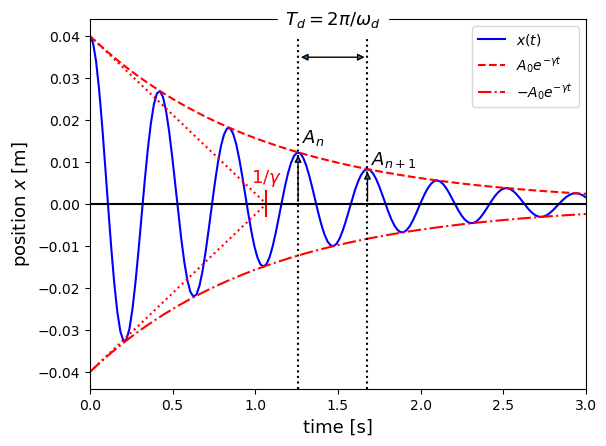

In [71]:
x_under, v_under = plot_LDHO(k, m, b_under, x0, v0)  # for pdf export

In [69]:
interact(plot_LDHO, k=FloatSlider(min=0., max=300., step=20, value=k), m=FloatSlider(min=0., max=2., step=0.2, value=m), b=FloatSlider(min=0., max=5., step=0.2, value=b_under), x0=fixed(x0), v0=fixed(v0))

interactive(children=(FloatSlider(value=180.0, description='k', max=300.0, step=20.0), FloatSlider(value=0.8, …

<function __main__.plot_LDHO(k, m, b, x0, v0)>

The behaviour is that of a (co)sine oscillation of (*pseudo*-)period $T_d = 2\pi/\omega_d$ (**not** $T_0 = 2\pi/\omega_0$), like for the SHO, multiplied by an exponential envelope that makes the waves decay.

*Note: I call $T_d$ the pseudo-period, some call it simply the period. Some of us prefer to refer to periods when systems are perfectly periodic. Here, the decay breaks the periodicity, and I prefer to talk about pseudo-periods. You will encounter both in problems and textbooks.*

### Logarithmic decrement

The *logarithmic decay* or *logarithmic decrement* is meant to be an objective measure of how fast the solution decays.
It is "objective" because it compares this decay rate with the duration of an oscillation, as we are about to see.

Let 
$$A_0 = 2|c\eexp{(\ci \omega_d - \gamma)(t=0)}| = 2|c|$$
the initial position amplitude,
$$A_n = A_0\eexp{-\gamma n T_d}\andeq A_{n+1} = A_0\eexp{-\gamma (n+1) T_d}$$
two points on the envelope, separated by one (pseudo-)period (see fig. above; you can see them as two consecutive local maxima of the position).
Their ratio is 
$$ \frac{A_{n}}{A_{n+1}} = \eexp{-\gamma T_d},$$
which does not depend on time nor $n$.
Then,
$$\ln\left(\frac{A_{n}}{A_{n+1}}\right) = \gamma T_d$$
The logarithmic decrement is $\gamma T_d$, and the tricky thing is to remember that the numerator corresponds to the preceding maximum.
I find it confusing because $A_n/A_{n+1} > 1$ or $\gamma T_d > 0$, which is weird for something that decreases.
It makes sense because if a value goes down, the decrement is positive, while the increment would be negative.
It is just a matter of semantics.

## Quality factor ('$Q$-value') of an oscillator

Another way to measure oscillations decay is with the quality factor.
For a lightly-damped oscillator, it serves a similar purpose as the logarithmic decrement, but its definition used $\omega_0$, not $\omega_d$, and therefore, it can be generalized to overdamped oscillators.

In many cases, we want a system to decay as slowly as possible. Take a pendulum that is supposed to keep time: you want it to oscillate for as long as possible.
If that is indeed what one wants, the damping has to be as weak as possible.
In this case, the *quality* of the system will therefore be measured by the ratio
$$ Q = \frac{\textrm{tendency to oscillate}}{\textrm{tendency to damp}}. $$
Now, there is no fool-proof definition of what these "tendencies" are.
But in the lightly damped oscillator (the only one, the $Q$-factor applies to), oscillations last longer when $\gamma \ll \omega_0$.
Therefore, a high "quality" (as defined by those for whom this is a quality...) is achieved when
$$ \boxed{Q = \frac{\omega_0}\gamma}. $$

With this definition, the pseudo-angular frequency can be written $$\omega_d^2 = \omega_0^2\left(1 - \frac1{Q^2}\right).$$

$Q$ is called the *quality factor*, $Q$*-factor* or $Q$*-value* of the oscillator.

It can be thought of as a measure of the number of oscillations (in radians) an oscillator can achieve within one duration $\tau = 1/\gamma$.
The number of natural cycles happening during $\tau$ is $n = \tau/T_0$; then $\boxed{Q = 2\pi n}$.

You can verify it on the figures of lightly damped oscillations that preceded: we always have $\gamma^{-1} = \tau \approx 0.94$ s, during which you see the oscillator perform about $2.3$ full cycles.
$2\pi \approx 6$, 2.3 cycles $\times$ 2$\pi \approx 14.5\approx 16 = Q$ (in a wet-finger kind-of-way).

In [ ]:
gamma_under = 0.5*b_under/m
Q = omega0/gamma_under
print('1/gamma = {0:.2f} and Q = {1:.2f}'.format(gamma_under, Q))

It works because $Q$ is high enough to say that $T_0 \approx T_d$.
For most practical matters, this is the case.

Note that for underdamped oscillators, there is a connection with the logarithmic decrement.
In fact, when the oscillator is lightly-damped, they are meant to quantify the same thing, namely, how to compare the decay rate with how fast the system oscillates.
When damping is very light, $\omega_0 \approx \omega_d$, and 
$$\text{Logarithmic decrement} = \gamma T_d \approx \gamma T_0 = \frac{2\pi \gamma}{\omega_0} = \frac{2\pi}Q.$$

**Some values**

| Oscillatory system | Typical value of Q |
| :-: | :-: |
| Paper weight suspended on a rubber band | 10 |
| Clock pendulum | 75 |
| Electrical LRC circuit | 200 |
| Plucked violin string | 1,000 |
| Microwave cavity oscillator | 10,000 |
| Quartz crystal | 1,000,000 |

## Heavy damping ($\omega_0^2 < \gamma^2$)

A heavily damped oscillator ($\Delta = \gamma^2 - \omega_0^2 >0$) is not even an oscillator: it just crashes down to its initial position exponentially.
If we now define 
$$ \alpha = \sqrt{\gamma^2  - \omega_0^2}\thrfor r_\pm = - \gamma \pm \alpha.$$

The general solution is now
$$ x(t) = c_+ \eexp{-(\gamma - \alpha)t} + c_- \eexp{-(\gamma + \alpha)t}. $$
Note that these two exponentials are always decaying, even $\eexp{-(\gamma-\alpha)t}$.
Indeed, 
$$ \alpha^2 = \gamma^2 - \omega_0^2 < \gamma^2 \quad \Rightarrow \quad \alpha < \gamma.$$

Once again, and for every second-order ODE, we have two coefficients to solve for, and we need two initial conditions to solve it.

***

*And once again, the specific derivation of $c_+$ and $c_-$ that follows doesn't really matter, and I didn't cover it in class, but I need it for plotting purposes.
Using the most general initial conditions. The expressions for $c_\pm$ are actually the same as in the underdamped case if you replace $\ci\omega_d$ with $\alpha$:*
$$c_\pm = \frac12\left(x_0 \pm \frac{v_0 + \gamma x_0}{\alpha}\right)$$ 

*(Do not memorize these!)*

***

Below, we plot for $x_0 = 4$ cm and $v_0 = 0$, just like for the previous example.

In [7]:
# let's plot
def plot_HDHO(k, m, b, x0, v0):
    # derived quantities
    gamma = 0.5*b/m  #  damping coefficient [1/s]
    
    alpha = (gamma**2 - omega0**2)**0.5
    r_p = +alpha - gamma
    r_m = -alpha - gamma
    c_p = 0.5*(x0 + (v0 + gamma*x0)/alpha)
    c_m = 0.5*(x0 - (v0 + gamma*x0)/alpha)

    x_p = c_p*np.exp(r_p*t)  # the first exponential
    x_m = c_m*np.exp(r_m*t)  # the second exponential
    x = x_p + x_m  # position [m]
    v = r_p*x_p + r_m*x_m

    ftsz = 13
    fig, ax = plt.subplots()
    # plotting the 1st exponential
    ax.plot(t, x_p, 'r--', label=r'$c_+e^{(-\gamma + \alpha) t}$')
    # plotting the 2nd exponential
    ax.plot(t, x_m, 'r-.', label=r'$c_-e^{(-\gamma - \alpha) t}$')
    # plotting the position x
    ax.plot(t, x, 'b', label='$x(t)$')
    ax.set_xlabel('time [s]', fontsize=ftsz) 
    ax.set_ylabel(r'position $x$ [m]', color='b', fontsize=ftsz)
    ax.tick_params('y', colors='b')  # color for y-axis is blue

    ax.grid()
    ax.axhline(0., color='k')  # draw the zero-axis as horizontal line
    ax.set_xlim(0., 1.5)

    plt.legend()
    plt.show()
    
    return x, v

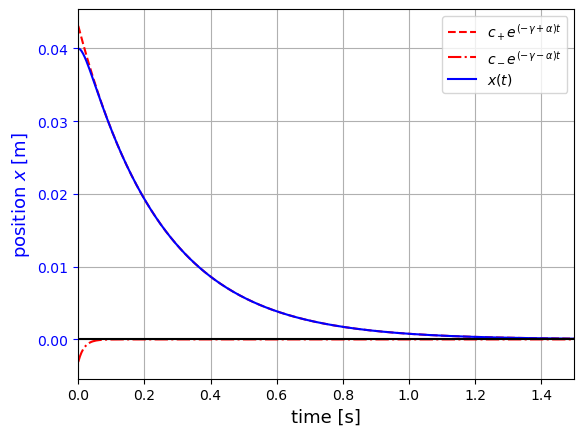

In [8]:
x_over, v_over = plot_HDHO(k, m, b_over, x0, v0)  # for pdf export

In [9]:
interact(plot_HDHO, k=FloatSlider(min=0., max=300., step=20, value=k), m=FloatSlider(min=0., max=2., step=0.2, value=m), b=FloatSlider(min=40., max=60., step=0.5, value=b_over), x0=FloatSlider(min=-0.1, max=0.1, step=1e-2, value=x0), v0=FloatSlider(min=-1., max=1., step=0.1, value=v0))

interactive(children=(FloatSlider(value=180.0, description='k', max=300.0, step=20.0), FloatSlider(value=0.8, …

<function __main__.plot_HDHO(k, m, b, x0, v0)>

So, we only have some kind of exponential decay, or more correctly, the sum of two exponential decays.

## Critical damping ($\omega_0^2 = \gamma^2$)

This case can feel weird: what a coincidence it would be to have both quantities equal!
As a natural scientist, I am actually inclined to discard it, because yes, coincidences are uninteresting when they occur naturally.
But if I was an engineer, I should not ignore this case: humans build stuff, and can make this coincidence happen.
In the end of this sub-section, I will show everyday applications. 
But for now, let's dive in.

First of all, equation \eqref{eq:DHO_gensol} does not work here with $a_p$ and $a_m$ being constant coefficients.
Indeed, $\omega^2_0 - \gamma^2 = 0$ means that $r_+ = r_- = -\gamma$. 
In that case, equation \eqref{eq:DHO_gensol} becomes 
$$ x(t) = (c_+ + c_-)\eexp{-\gamma t} $$
and if $c_+$ and $c_-$ are constant, the velocity is $v(t) = -\gamma x(t)$.
This is a problem.
To realize why, imagine what will happen if we have $x_0 \neq 0$ and $v_0 = 0$, like in most of our previous examples?
It is an *overprescribed* or *overconstrained* problem, in which there is more independent information than there are degrees of freedom to accommodate for it.
In short, it is impossible unless $x(t) = 0$ at all times, and then, who cares?

Yes. I know. The adopt-an-exponential method failed.

![https://tenor.com/view/desperate-housewives-hilarious-guns-gun-housewife-gif-15909632](momma.gif)

The ODE decided it did not want to adopt any exponential, it wants a different kind of solution, although one that still has two degrees of freedom. You might see the reason why in a calculus course, but for now, let's just accept the fact that in this very particular case, the general solution is
$$ x(t) = (A + Bt)\eexp{-\gamma t},\with (A, B)\in \mathbb R^2.$$

![GoT wisdom](itisKnown.gif)

You do want to check for yourself that the solution above is a solution.
It has two degrees of freedom, and a good math course would tell you that the space of solutions to a 2nd-order ODE is two-dimensional.
Therefore, if this is **one** solution, it is **the** solution, by virtue of the existence-and-uniqueness of the solutions.

The velocity is
$$v(t) = (B - \gamma A - \gamma Bt)\eexp{-\gamma t}.$$
with $A$ and $B$ TBD.
Two initial conditions, two unknowns: yay!

***

*And for the last time, I need what follows for plotting purposes.
Using the most general initial conditions,*

* $x(t=0) = x_0 = A$, and
* $v(t=0) = v_0 = B - \gamma A = B - \gamma x_0 \quad\Rightarrow \quad B = v_0 + \gamma x_0$.

*(Do not learn this!)*

***

Below, we plot for $x_0 = 4$ cm and $v_0 = 0$, just like for the other examples.

In [10]:
# let's plot
def plot_CDHO(k, m, x0, v0):
    # I will use the same coefficients except for the damping
    gamma = omega0

    # derived quantities
    t = np.linspace(0., 3., 1024)
    A = x0
    B = v0 + gamma*x0

    x = (A + B*t)*np.exp(-gamma*t)  # position [m]
    v = (B - gamma*(A+B*t))*np.exp(-gamma*t)  # velocity [m/s]

    ftsz = 13
    fig, ax = plt.subplots()
    ax = fig.gca()
    ax.plot(t, x, 'b', label='$x(t)$')  # position x
    ax.set_xlabel('time [s]', fontsize=ftsz) 
    ax.set_ylabel(r'position $x$ [m]', color='b', fontsize=ftsz)
    ax.tick_params('y', colors='b')  # color for y-axis is blue

    ax.grid()
    ax.axhline(0., color='k')  # draw the zero-axis as horizontal line
    ax.set_xlim(0., 1.)
    plt.show()
    
    return x, v

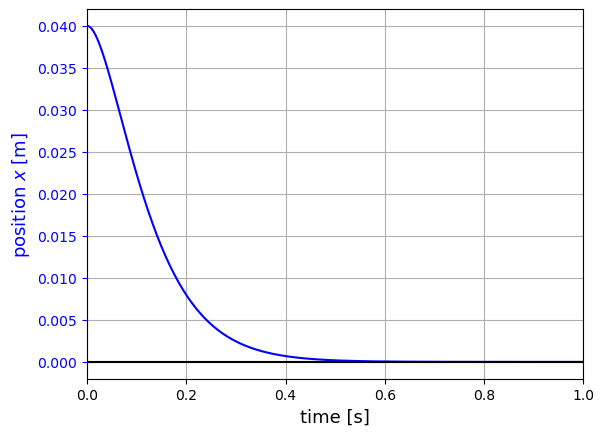

In [11]:
x_crit, v_crit = plot_CDHO(k, m, x0, v0)

Back to the everyday application I promised.
Notice how the decay is faster than the previous, overdamped oscillator.
In fact, the critically-damped oscillator is the one that decays the fastest without oscillating.

Indeed, in the overdamped case, there are two exponentials.
And because $r_- < -\gamma$, then $\eexp{r_- t}$ always decays more slowly than $\eexp{r_+ t}$, and the slowest sets the pace (as is hopefully visible in the figure of the overdamped oscillator above).
In other words, we need to compare the decay of the critically damped oscillator with the decay of $\eexp{r_- t}$.

For the critically damped oscillator, the slowest term to decay is $t\eexp{-\gamma t}$, because it decays slower than $\eexp{-\gamma t}$. But even the decay of $t\eexp{-\gamma t}$ is faster than an overdamped oscillator which decays as $\eexp{r_- t}$.

*More math, but the reason is that if $\beta_1 > \beta_2 >0$, even $t\eexp{-\beta_1 t}$ decays faster than $\eexp{-\beta_2 t}$. The general mathematical result is that if $\beta_1 > \beta_2 >0$, let $P_n$ a polynomial of order $n$. 
Then, $P_n(t)\eexp{-\beta_1 t}$ decays faster than $\eexp{-\beta_2 t}$, i.e., $$\forall n \in \mathbb N,\quad \lim_{t\to \infty} \left[P_n(t)\eexp{(\beta_2 - \beta_1)t}\right] = 0.$$I do not know at which point you will learn this calculus result, or if you already did, but it is true. Just accept this fact for this class.*

![More GoT wisdom](itisKnown.gif)

This property can be desirable, a famous example being a car suspension system, which consists in a spring and a dampener (or shock absorber) in parallel.
If the spring was too stiff or the shock absorber too soft, shocks would turn into oscillations and passengers would bounce up and down.
On the other hand, if the spring was not very stiff or the shock absorber too hard to move, shocks would also be transmitted to the car: the car might fly a little, fall hard on the ground, and so on.
A car maker wants the shock to be smoothed (not too stiff a spring, not too soft an absorber), but also that the energy doesn't linger in the car for too long (stiff enough a spring, soft enough an absorber): it is looking for critical damping to be achieved for the mass of a car + standard load.

Other possible applications:

* needle on a meter (don't want to wait for too long for the meter to reach value, but don't want it to oscillate around the value either),
* shock absorber + spring for a door that is meant to close automatically (don't want the cold winter wind to gush in for too long, but don't want the door to slam against the frame either).

## Summary

I invite you to re-watch the YouTube video I showed last lecture and repeated at the beginning of this set of notes, (pendulum whose oscillation is being damped by a magnet), in order to revisit what the three regimes mean.

Below, I plot the three cases that we have seen so far.
Note that the values of all parameters but $b$ (or $\gamma$) are kept constant. 
$b$ (or $\gamma$) is the only parameter that we vary across all cases.

In [12]:
# let's plot
def plot_DHO_time_series():
    # I will use the same parameters except for the damping
    fig, ax = plt.subplots()
    ftsz = 13
    ax.plot(t, x_crit, 'b', label='critical')  # plotting the position x
    ax.plot(t, x_over, 'r--', label='overdamped')  # plotting the position x
    ax.plot(t, x_under, 'g-.', label='underdamped')  # plotting the position x
    ax.set_xlabel('time [s]', fontsize=ftsz) 
    ax.set_ylabel('position $x$ [m]', color='b', fontsize=ftsz)
    ax.tick_params('y', colors='b')  # color for y-axis is blue

    ax.grid()
    ax.axhline(0., color='k')  # draw the zero-axis as horizontal line

    plt.tight_layout()
    ax.set_xlim(0., 3.)

    plt.legend()

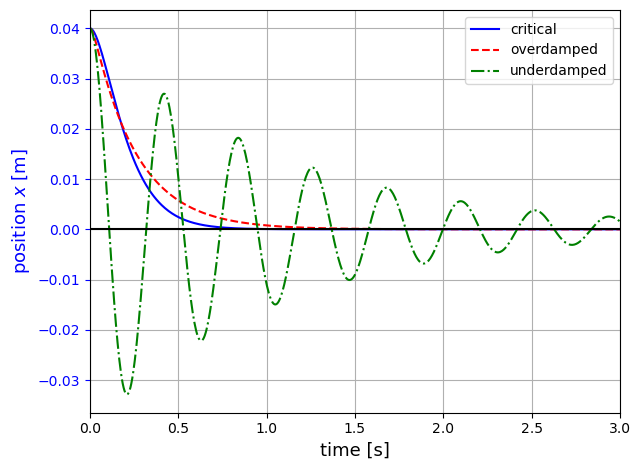

In [13]:
plot_DHO_time_series()

Note above how the transition from under- to overdamped happens, and how an overdamped oscillator takes too long to land.

1. $\gamma^2 < \omega_0^2$: light damping, or underdamped oscillator. Damped oscillations.

2. $\gamma^2 > \omega_0^2$: heavy damping, or overdamped oscillator. Exponential decay to equilibrium position.

3. $\gamma^2 = \omega_0^2$: critical damping. Quickest return to equilibrium position without overshoot.

And here is the phase plot.
But first, as a point of comparison, recall that in the no-damping case, the solution is
$$x = x_0\cos(\omega_0 t) + \frac{v_0}{\omega_0}\sin(\omega_0 t)$$
and 
$$v = -\omega_0 x_0\sin(\omega_0 t) + v_0\cos(\omega_0 t).$$

In [14]:
A0 = np.sqrt(x0**2 + (v0/omega0)**2)
V0 = A0*omega0
x_SHO = x0*np.cos(omega0*t) + v0/omega0*np.sin(omega0*t)
v_SHO = -omega0*x0*np.sin(omega0*t) + v0*np.cos(omega0*t)

In [15]:
def plot_DHO_phase():
    """ Second figure shows phase diagram """ 
    plt.plot(x_SHO/A0, v_SHO/V0, 'grey', label='SHO')
    plt.plot(x_under/A0, v_under/V0, 'g-.', label='underdamped')
    plt.plot(x_crit/A0, v_crit/V0, 'b', label='critical')
    plt.plot(x_over/A0, v_over/V0, 'r--', label='overdamped')
    plt.xlabel(r'$x/A_0$')
    plt.ylabel(r'$v/(\omega_0A_0)$')
    plt.grid()
    plt.title('Phase portrait')
    plt.axhline(0., color='k')  # $v=0$ axis
    plt.axvline(0., color='k')  # $x=0$ axis
    plt.legend()
    plt.axis('equal')
    return

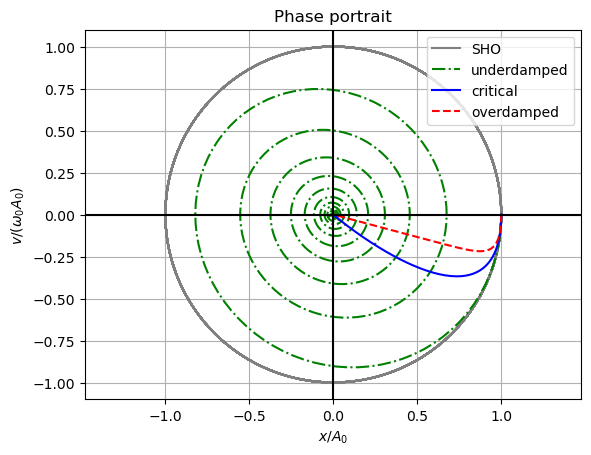

In [16]:
plot_DHO_phase()

* All the curves go towards the origin, i.e., the point of no motion.
    The point $(x, \dot x) = (0, 0)$ is called the "attractor" for all damped solutions in phase space.
* We see that none of these motions are periodic because the curves never "loop back" onto themselves. Notice the neat spiral for the underdamped case. 
* Later we will think about the phase flow of this kind of mechanical system.
    The phase flow represents the way entire sets of initial conditions evolve in phase space.
    For conservative systems (no damping), the phase flow preserves area or volume (here, the area of the disk).
    For dissipative systems, the phase flow shrinks volumes.
    For unstable systems, the phase flow increases volumes.

# Driving an oscillator

## Getting some intuition

So far, we have seen *free* oscillations of damped and undamped oscillators. 
This was a necessary first step, because such oscillations described the *free* behaviour of the system.
We now turn to what happens when oscillations are *forced*, or *driven*: we impose a forcing on the oscillator, and in the context of this class, this forcing is sinusoidal, with a very well-defined frequency.

You have an intuitive knowledge of what is about to happen already. 
Imagine yourself on a swing.
Sitting on the swing, you back up to get your first impulse, and let yourself swing.
If you don't make any move, your trajectory should be well described as a DHO, with a frequency $\omega_d$.
Now, move your legs, in order for your trajectory to rise higher and higher up.
Intuitively, you kick your legs with a frequency that roughly matches $\omega_d$ or $\omega_0$ (you probably aren't precise enough to tell the difference).
And again, intuitively, you know that you have to kick your legs back-and-forth **in sync** with what the free oscillation would be if you weren't. 
You also know that there is a particular moment in the cycle at which you need to kick your legs: intuitively, you know that your forcing has to have a certain **phase shift** with respect to your position or velocity.
The forcing you are imparting on the {you+swing+damping} system is *resonant*.

Intuitively still, you know that if you were kicking your legs very fast, say, every two seconds or so, the swing would oscillate at that frequency, but you would not go very far.
In that case, your forcing would be *off-resonant*.

Drawing a graph of how high you go vs. the frequency of your legs, you know that there is a resonant frequency somewhere ($\nu \approx 0.2$ Hz or so) where your amplitude will be maximum, and that if you kick too fast or too slow, your amplitude will be tiny.
And fortunately for swing makers, you also know intuitively that you don't have to be extremely precise in the timing of your kicks every $T_d$.
It means that the peak around the resonance has some width.

At some point, no matter how high you kick, your amplitude will stop growing and you won't loop around the swing. 
At that point, the simple harmonic oscillator model, damped or not, will have stopped being valid a few kicks ago, because of non-linear effects.
This is the typical behaviour of a forced linear harmonic oscillator: force too fast or too slow, and the oscillator will respond at the forcing frequency, although weakly so.
Force at the frequency that it would oscillate at if left alone, and the amplitude of the oscillator will grow until the linear model stops being valid.
Finally, with strong enough dissipation, the amplitude of the oscillations will remain finite, even at resonance, because of energy being removed from the system fast enough.

I just summarized in a few paragraphs what I am about to describe in the rest of this lecture and the next.
Examples of straight-out resonant phenomena abound: bow on a violin string, brass instruments, pendulum clock, resonant tides in the Bay of Fundy between Nova Scotia and New Brunswick, that funny Tacoma bridge that went resonant in the 40's, your washing machine that shakes at a very particular angular speed during spin-up and slow-up phases...
More importantly perhaps, many systems, some industrial, some natural, some physical, some electronic, contain all sorts of vibrations, some desirable, some not. 
Each of these vibration modes can be described as a DHO, and mapping which one will resonate and grow, controllably or not, under which circumstances, is an essential step to understand or design a system.

All these examples are nice and cool... but let's face it, from a modelling perspective, we should stick to what we do best: the mass and spring. See video below (Jupyter), also at https://youtu.be/Is7shffFJFs and https://play.library.utoronto.ca/38c33b3600f45d81ad8c735996a91336.

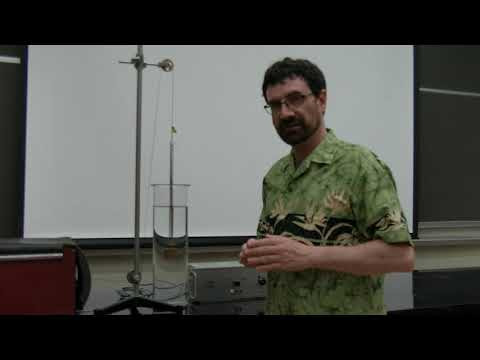

In [18]:
YouTubeVideo('Is7shffFJFs', width=560, height=300)

![Fig. 1: DHO in resonance, driven at frequency $\omega = \omega_0$, with $\omega_0 =1$ rad$\,s$^{-1}$, $\gamma = 0.02$ s$^{-1}$. (By Jkrieger [CC BY-SA 3.0 (https://creativecommons.org/licenses/by-sa/3.0)], from Wikimedia Commons)](Spring_resonance_simple.gif)

In a first time, we add some forcing to the undamped SHO, mostly for simplicity.
We will re-introduce damping later.

## Driving an undamped harmonic oscillator

### Equation of motion

Let's go back to our original SHO: a spring attached to a mass, without friction.
But this time, we attach the system to a little oscillating engine-that-can instead of a fixed wall, and the frequency of its oscillation is $\omega$.
We call $\omega$ the *driving frequency*, or *forcing frequency*.
Contrary to $\omega_0$, the driving frequency is not a property of the oscillator, instead it is imposed by the operator (you).
Define the position of the engine or moving wall as
$$\xi = A_f \cos(\omega t).$$
No phase, because we decide that the forcing defines what a zero-phase means: if the motion is perfectly in phase with the forcing, its phase will be zero, if they are in phase opposition, then the response will have phase $\pi$, etc.

Attaching the spring to a moving wall is not the same as applying a force to a mass, you might say.
It isn't indeed, but because the spring is stretched and compressed due to the motion of the wall, the force of the spring acting on the mass is:
$$ F_{spring\to mass} = -k[x - \xi(t)] = -k[x - A_f\cos(\omega t)], $$
where $x$ is still the position of the mass.
Now, do the now-standard $m\ddot x = -k[x - A_f\cos(\omega t)]$, divide by the mass, move $-kx$ to the left-hand-side and leave the term in $A_f$ on the right-hand-side to obtain
\begin{equation}
    \ddot x + \omega_0^2 x = \omega_0^2 A_f \cos(\omega t),
    \label{eq:SHO_drive_real}
\end{equation}
with $\omega_0^2 = k/m$.

Notice that equation \eqref{eq:SHO_drive_real} is inhomogeneous.
That means the total solution is the sum of a particular solution $x_p$, and of the homogeneous solution $x_h$.
The general solution is then written
$$x = x_h + x_p.$$
We actually already know the homogeneous solution: it is the one without driving, also known as SHM.
And if we had damping, it would be the solution we derived in this lecture.

So, let's focus on the particular solution.

We could carry around these sines and cosines, or we could do it our way: switch to the complex space, and take the real parts at the end only.
So, let's study the following problem instead:
$$ \boxed{\ddot z + \omega_0^2 z = \omega_0^2A_f\eexp{\ci\omega t}},$$
with $z \in \mathbb C$ and $\text{Re}(z) = x$.
In fact, the whole real part of that equation is equation \eqref{eq:SHO_drive_real}.
Note that for the trick to work easily, replacing $\cos(\omega t)$ by $\eexp{\ci \omega t}$ is highly recommended.
It is not necessary, but keeping it real on the RHS would practically void the usefulness of the method.

### General solution

We let our previous problem adopt an exponential, $z = Z\eexp{rt}$:
$$\ddot z + \omega_0^2 z = \left(r^2 + \omega_0^2\right)Z\eexp{rt} = \omega_0^2 A_f \eexp{\ci\omega t}.$$

Now, each side is one constant multiplying a time-varying exponential.
For this to work, the time-dependence of each side must be the same, and therefore, $r = \ci \omega$.
This is important: **the response of an oscillator to a driving at frequency $\omega$ is an oscillation at the same frequency, $\omega$.**

We are left with
\begin{equation}
    Z = \frac{\omega_0^2 A_f}{\omega_0^2 - \omega^2}.
    \label{eq:ZinC}
\end{equation}
Notice how $Z$ depends on $\omega$.
This is what we were describing earlier, when we wrote that the amplitude of the response will depend of the frequency of the forcing.

We got $r$, we got $Z$, and you might say that we are done.
But there is something else we need to do: we noticed in the (recorded) demo that at low frequency, the mass and the forcing oscillated in phase.
We also noticed that at high frequency, they oscillated out-of-phase.
So, there is something about this phase business that isn't immediately apparent above.
That's because the phase info is hidden in $Z$, which isn't obvious at first.

Before moving forward, let me recall that the forcing defines the phase zero.
We enforced it when we decided that the forcing was $\omega^2_0 A_f\eexp{\ci\omega t}$ with $A_f\in \mathbb R$, which has zero phase.
Therefore, if the response has a phase zero as well, it will be in phase with the forcing, and any phase shift will be a phase shift with the forcing.

To sort out this phase, let's use a polar representation of $Z$, namely,
$$Z(\omega) = A(\omega)\eexp{-\ci \delta}.$$
Recall that by definition of the polar representation, $A(\omega)$ is real and positive.
Based on equation \eqref{eq:ZinC}, we then have
$$A(\omega) = \frac{\omega_0^2 A_f}{|\omega_0^2 - \omega^2|} \andeq \eexp{-\ci\delta} = \text{sign}\left(\omega_0^2 - \omega^2\right).$$
The last bit is weird, but if you think about it, it's the only way to make it work.
The RHS of eqn. \eqref{eq:ZinC} was real, so, the LHS had to be as well.
Therefore, $\eexp{-\ci\delta}$ can only be $\pm 1$, and which one it is gets decided based on the sign of the denominator of the RHS, the only one that can be either negative or positive.

### Non-resonant cases

#### Low frequencies, $\bs{\omega}$ < $\bs\omega_0$

We then have
$\text{sign}(\omega_0^2 - \omega^2) = +1 = \eexp{-\ci \delta}$, and therefore $\delta = 0$. 

The response is 
$$x(t) = \text{Re}(z) = A(\omega)\cos(\omega t), \with A(\omega) = \frac{\omega_0^2 A_f}{\omega_0^2 - \omega^2}.$$

This is compatible with our thought experiment (and demo recording) of a very slow oscillation:
$$ \omega/\omega_0 \to 0 \thrfor \delta = 0\quad \textrm{and} \quad A/A_f \to 1. $$
That is, $x(t) \to \xi(t)$, the case of a moving wall so slow the spring does not compress nor stretch.

#### High frequencies, $\bs{\omega}$ > $\bs\omega_0$

We then have
$\text{sign}(\omega_0^2 - \omega^2) = \eexp{-\ci \delta} = -1$, and therefore $\delta = \pi$. 

The response is 
$$x(t) = \text{Re}(z) = A(\omega)\cos(\omega t - \pi) = -A(\omega)\cos(\omega t), \with A(\omega) = \frac{\omega_0^2 A_f}{\omega^2 - \omega_0^2}.$$

In this case, the wall and the mass oscillate at the same frequency, but in opposition of phase, again agreeing with our introductory demos.
We also have
$$\lim_{\omega/\omega_0 \to +\infty}\left[\frac{A(\omega)}{A_f}\right] = 0,$$
meaning that the mass will barely move.

Before moving to the $\omega=\omega_0$ case, let's plot what we have so far.

In [19]:
A_f, omega_0 = 0.25, 2.  # to illustrate
T_0 = 2*np.pi/omega_0
t = np.linspace(0, 6*T_0, 1024)  # time array
omega_array = np.linspace(0.01*omega_0, 3*omega_0, 1024)  # array of angular frequencies

In [84]:
def plot_driven_SHO():
    omega_low = omega_array[omega_0 > omega_array]  # same but just for omega < omega0
    omega_high = omega_array[omega_0 < omega_array]  # same but just for omega > omega0

    A_low = A_f*omega_0**2/(omega_0**2 - omega_low**2)
    A_high = A_f*omega_0**2/(omega_high**2 - omega_0**2)

    delta_low = 0.*omega_low
    delta_high = np.pi + 0*omega_high  # an array of same shape as omega_high,
    # in which all elements are pi.

    ftsz = 13  # font size on plots

    plt.figure()

    # the sub-plot for the amplitude
    plt.subplot(211)  
    ax1 = plt.gca()
    ax1.plot(omega_low/omega_0, A_low/A_f, 'b')  # amplitude for omega < omega_0
    ax1.plot(omega_high/omega_0, A_high/A_f, 'b')  # amplitude for omega > omega_0
    ax1.axvline(1., color='k', linestyle='--')  # the omega = omega_0 mark
    ax1.set_xlabel('$\omega/\omega_0$]', fontsize=ftsz) 
    ax1.set_ylabel(r'$A(\omega)/A_{\!f}$', fontsize=ftsz)
    ax1.set_ylim([0, 6.])
    ax1.set_xlim([0., 3.])
    ax1.set_yticks([1., 2., 3., 4., 5., 6.])
    ax1.grid()

    # the sub-plot for the phase
    plt.subplot(212)  
    ax2 = plt.gca()
    ax2.plot(omega_low/omega_0, delta_low, 'r')  # phase for omega < omega_0
    ax2.plot(omega_high/omega_0, delta_high, 'r')  # phase for omega > omega_0
    ax2.axvline(1., color='k', linestyle='--')  # omega = omega_0 mark
    ax2.set_xlabel('$\omega/\omega_0$', fontsize=ftsz) 
    ax2.set_ylabel(r'$\delta(\omega)$ [rad]', fontsize=ftsz)
    ax2.set_ylim([-0.1*np.pi, 1.1*np.pi])
    ax2.set_xlim([0., 3.])
    ax2.set_yticks([0., np.pi])
    ax2.set_yticklabels(['$0$', '$\pi$'], fontsize=ftsz)
    ax2.annotate(text='$\omega=\omega_0$', xy=(1., 0.5*np.pi), xytext=(1.15, 0.6*np.pi),
                 arrowprops=dict(arrowstyle='->'), fontsize=ftsz)
    ax2.text(0.1, np.pi/10., '$F$, $x$ in phase', fontsize=ftsz, color='r')
    ax2.text(1.75, np.pi*0.85, '$F$, $x$ out of phase', fontsize=ftsz, color='r')
    ax2.grid()

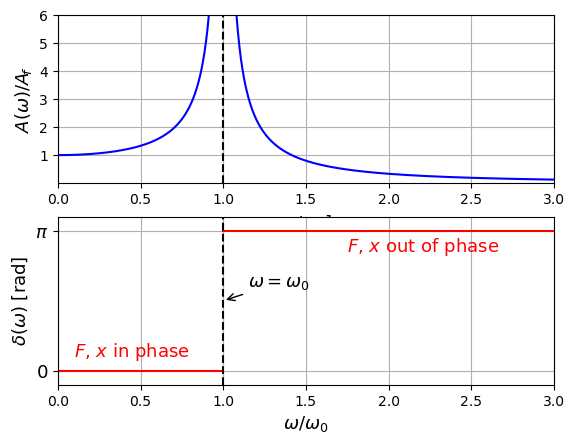

In [85]:
plot_driven_SHO()

#### Resonance, $\bs{\omega}$ = $\bs\omega_0$

In that case, $A(\omega) \to \infty$!
This is because the forcing keeps supplying energy to the system at a frequency that it likes, and the system will absorb all of that energy continuously.
And without damping, the system has no way to evacuate that energy, so, the amplitude keeps increasing as long as the linear approximation is valid. (After that, our model cannot predict what will happen.)
The expression $x(t) = A(\omega)\cos(\omega t - \delta(\omega))$ ceases to be a solution of the original equation of motion.
There is actually a mathematical solution for this case, *which you are not required to know*, but I find it instructive to plot it.
Indeed, you can check that
\begin{equation}
    x(t) = \frac12 A_f\omega_0 t \cos\left(\omega_0 t - \frac\pi2\right)
    \label{eq:xResUndamped}
\end{equation}
is a solution of $\ddot x + \omega_0^2 x = \omega_0^2 A_f\cos(\omega_0 t)$.

Notice the $-\pi/2$ phase shift. It means that at resonance, the position is a quarter-cycle behind the forcing, and this will carry over to the more realistic case with damping. This phase shifts ensures optimal energy transfer to the oscillator.

I find phase shifts hard to represent. If you struggle like me, imagine yourself on a swing again.
Let's define the positive angle as when your feet are facing the sky.
For the forcing, let's define the positive sign when your legs are stretched forward, in the same direction as the positive angle.
Now, think about when the forcing (your legs) goes from positive to negative (from stretched forward to tucked under the seat): you do this motion when you are on top.
This is when the forcing is equal to zero (transitioning from positive to negative) is when the angle is maximally positive.
And you want the forcing to be maximally negative (legs tucked under) when you cross the vertical line, zero angle, full negative speed ahead. This happens 1/4 cycle after you were on top of the swing, and so, the forcing is indeed 1/4 cycle ahead of the position.

It might actually be easier to remember that it has to be in phase with the velocity: you want to push in the same direction as the velocity, this is when the forcing work power $P = \vec F \cdot \vec v$ is maximum.
So, this power is always positive, the oscillator accumulates energy and without damping, there is nothing to remove it.
This is why the amplitude diverges.
*(Note that this particular piece of reasoning only better with damping, which we are about to add.)*

![More GoT wisdom](itisKnown.gif)

In [22]:
def plot_resonant_SHO():
    ftsz = 13
    # derived quantities
    xi = A_f*np.cos(omega_0*t)
    x = A_f*omega_0*t*np.cos(omega_0*t - 0.5*np.pi)/2.
    envelope = A_f*omega_0*t/2.

    fig = plt.figure()
    ax1 = fig.gca()
    ax1.plot(t/T_0, xi/A_f, 'r--', label=r'$\xi(t)/A_f$')  # wall position xi
    ax1.plot(t/T_0, x/A_f, 'b', label='$x(t)/A_f$')  # mass position x
    ax1.plot(t/T_0, envelope/A_f, 'b-.', label='$\pm A_{\!f} \omega_0 t/2$')  # envelope
    ax1.plot(t/T_0, -envelope/A_f, 'b-.')  # envelope
    ax1.set_xlabel('time $t/T_0$', fontsize=ftsz) 
    ax1.set_xlim([0., t.max()/T_0])

    # annotation to highlight the period
    ax1.axvline(3, color='k', linestyle='-.')  # the t=3T mark
    ax1.axvline(4, color='k', linestyle='-.')  # the t=4T mark
    ax1.annotate(text='', xy=(3, 3.7/A_f), xytext=(4, 3.7/A_f),
                 arrowprops=dict(arrowstyle='<|-|>'))  # the double arrow
    ax1.text((3 + 0.5), 4.5/A_f, r'$T_0 = 2\pi/\omega_0$',
             verticalalignment='center', horizontalalignment='center',
             backgroundcolor='w', fontsize=ftsz)

    ax1.grid()
    ax1.axhline(0., color='k')  # draw the zero-axis as horizontal line

    plt.legend(loc='lower left')

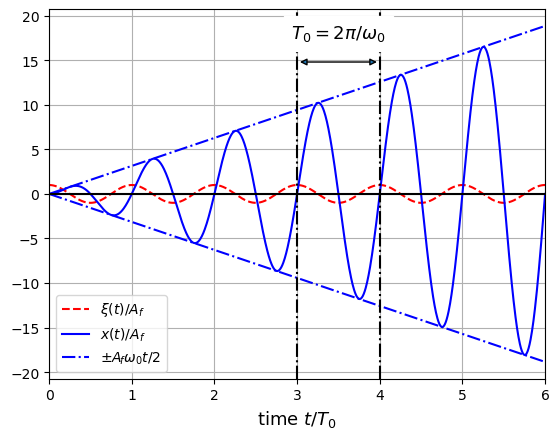

In [23]:
plot_resonant_SHO()

It grows and grows and grows... This is a good approximation for small times of a resonance phenomenon, while the velocity is small enough that friction doesn't act.

Damping will regularize this entire situation.

# Driving a damped oscillator

Adding damping adds a few differences with the previous, undamped case.
In short, the mathematically weird stuff in the previous solution gets regularized: the weird jump in phase from $0$ to $\pi$ and the diverging amplitude get a more physical treatment.

You know the drill: FBD with a moving wall, dividing by the mass, rearranging to let the free part of the equation or the LHS and leaving the forcing on the RHS yields
$$ \ddot x + 2\gamma \dot x +\omega_0^2x = \omega_0^2 A_f\cos(\omega t). $$ 

Once again, we will focus on the particular solution, for the same reasons as before.
This is even more justified because with damping, the homogeneous solution would eventually die.
We will come back to it.

Before adopting an exponential, let's move to the complex space,
$$\ddot z + 2\gamma \dot z + \omega_0^2 z = \omega_0^2 A_f \eexp{\ci \omega t},$$

Let it adopt an exponential $z = Z\eexp{rt}$ and just like for the undamped case, you quickly obtain
$$r = \pm\ci \omega \andeq \left(-\omega^2 +2 \ci \gamma \omega + \omega_0^2\right) Z = \omega_0^2 A_f,$$
or
$$Z = \frac{\omega_0^2 A_f}{\omega_0^2 - \omega^2 +2 \ci \gamma \omega}.$$
Technically, we solved the problem with this, a computer could just plot the magnitude and phase of this for us.
But let's try to understand this solution with pen-and-paper... Next time!

# Summary

In this lecture, we saw the following.

* How adding a bit of friction changes the equation of motion of a free oscillator and the shape of the solutions, but how "adopt-an-exponential" still works fine most of the time.
* How there are three regimes when there is friction: underdamped (keeps oscillating but decays), overdamped (does not oscillate; friction is so large that the system barely moves, takes a while to decay), and critical (in-between case; fastest return to zero).
* Definition of the $Q$-factor, which compares how fast a system oscillates (if it oscillates) vs. how fast it decays.
* Driving an oscillator yields a response at the driving frequency, not the natural frequency.
    The amplitude is maximum when the two match (actually, without damping, it diverges), and there might be phase shifts between forcing a response.
* That adding damping also leads to a mathematical solution. (*We will study it in more detail next time.*)